In [40]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the csv file into a pandas DataFrame
player = pd.concat([pd.read_csv(f) for f in glob.glob('player_data/*.csv')], 
                             ignore_index = True)

player.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV.1,PP.1,SH.1,S,TOI,ATOI,BLK,HIT,FOW,FOL
0,Justin Abdelkader\abdelju01,20,DET,LW,2,0,0,0,0,2,...,0,0,0,6,24,12:13,0.0,5,5.0,7.0
1,Craig Adams\adamscr01,30,TOT,RW,75,4,7,11,-16,58,...,7,0,0,63,810,10:48,43.0,117,19.0,22.0
2,Kevyn Adams\adamske01,33,CHI,C,27,0,2,2,-7,13,...,0,0,2,32,295,10:56,11.0,13,103.0,104.0
3,Maxim Afinogenov\afinoma01,28,BUF,RW,56,10,18,28,-16,42,...,13,5,0,114,899,16:03,6.0,25,1.0,4.0
4,Andrew Alberts\alberan01,26,BOS,D,35,0,2,2,4,39,...,2,0,0,25,722,20:37,52.0,53,1.0,1.0


In [3]:
# Drop non numerical columns
cleandf = player.drop(columns = ['Player', 'Tm', 'Pos', 'ATOI'])
cleandf.head()

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,GW,EV.1,PP.1,SH.1,S,TOI,BLK,HIT,FOW,FOL
0,20,2,0,0,0,0,2,0.0,0,0,...,0,0,0,0,6,24,0.0,5,5.0,7.0
1,30,75,4,7,11,-16,58,-0.6,3,0,...,1,7,0,0,63,810,43.0,117,19.0,22.0
2,33,27,0,2,2,-7,13,-0.6,0,0,...,0,0,0,2,32,295,11.0,13,103.0,104.0
3,28,56,10,18,28,-16,42,1.6,9,1,...,1,13,5,0,114,899,6.0,25,1.0,4.0
4,26,35,0,2,2,4,39,1.2,0,0,...,0,2,0,0,25,722,52.0,53,1.0,1.0


In [4]:
# Determine max of points column
cleandf['PTS'].describe()

count    8845.000000
mean       20.672018
std        20.800314
min         0.000000
25%         3.000000
50%        14.000000
75%        33.000000
max       113.000000
Name: PTS, dtype: float64

In [5]:
# Replace NAN values with the mean
cleandf.fillna(cleandf.mean(), inplace=True)

In [6]:
# Preprocessing the data
bins = (-1, 34.5, 113)
group_names = ['mediocre offensive players', 'best offensive players']
cleandf['PTS'] = pd.cut(cleandf['PTS'], bins = bins, labels = group_names)
cleandf['PTS'].unique()

[mediocre offensive players, best offensive players]
Categories (2, object): [mediocre offensive players < best offensive players]

In [7]:
label_quality = LabelEncoder()

In [8]:
cleandf['PTS'] = label_quality.fit_transform(cleandf['PTS'])
cleandf.head(5)

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,GW,EV.1,PP.1,SH.1,S,TOI,BLK,HIT,FOW,FOL
0,20,2,0,0,1,0,2,0.0,0,0,...,0,0,0,0,6,24,0.0,5,5.0,7.0
1,30,75,4,7,1,-16,58,-0.6,3,0,...,1,7,0,0,63,810,43.0,117,19.0,22.0
2,33,27,0,2,1,-7,13,-0.6,0,0,...,0,0,0,2,32,295,11.0,13,103.0,104.0
3,28,56,10,18,1,-16,42,1.6,9,1,...,1,13,5,0,114,899,6.0,25,1.0,4.0
4,26,35,0,2,1,4,39,1.2,0,0,...,0,2,0,0,25,722,52.0,53,1.0,1.0


In [9]:
cleandf['PTS'].value_counts()

1    6778
0    2067
Name: PTS, dtype: int64

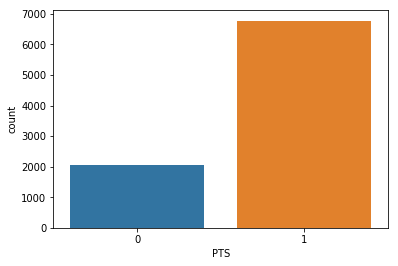

In [10]:
sns.countplot(cleandf['PTS'])
plt.show()

In [11]:
# Assign the data to X and y, x predicts y
X = cleandf[['EV', 'PP', 'SH']]
y = cleandf["PTS"]

In [12]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[:10]
y_train

7760    1
6566    0
7918    1
1539    1
6961    1
1211    0
7293    1
7922    1
672     1
6198    1
4995    1
7277    1
2716    1
4974    1
7530    1
1464    1
4921    1
7406    1
1192    1
2794    1
2264    1
421     0
505     1
8519    0
2623    1
1582    0
506     1
6844    1
2405    1
6215    1
       ..
4658    1
3005    0
2734    0
189     1
2747    0
2047    1
7849    1
2558    1
8666    1
6396    1
3385    1
4555    1
1184    1
6420    1
5051    1
5311    0
2433    1
6949    0
769     1
1685    1
8322    1
5578    1
4426    0
466     1
6265    1
5734    1
5191    1
5390    1
860     0
7270    0
Name: PTS, Length: 6191, dtype: int32

In [15]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [16]:
# See how well the model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       614
           1       0.93      0.97      0.95      2040

   micro avg       0.92      0.92      0.92      2654
   macro avg       0.90      0.87      0.88      2654
weighted avg       0.92      0.92      0.92      2654

[[ 473  141]
 [  67 1973]]


In [17]:
# Random Forest Accuracy Score
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.921627731725697

# SVM (Support Vector Machine) Classifier

In [18]:
from sklearn.svm import SVC
from sklearn import svm

# Create SVM model

clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [19]:
# See how well the model performed

print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))


              precision    recall  f1-score   support

           0       0.88      0.76      0.82       614
           1       0.93      0.97      0.95      2040

   micro avg       0.92      0.92      0.92      2654
   macro avg       0.91      0.86      0.88      2654
weighted avg       0.92      0.92      0.92      2654

[[ 466  148]
 [  61 1979]]


In [20]:
# SVM Accuracy Score

svm = accuracy_score(y_test, pred_clf)
svm

0.9212509419743783

# Neural Network

In [21]:
# Use MLPClassifier to create neural network model

mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [22]:
# See how well the model performed

print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       614
           1       0.94      0.96      0.95      2040

   micro avg       0.93      0.93      0.93      2654
   macro avg       0.90      0.89      0.89      2654
weighted avg       0.92      0.93      0.93      2654

[[ 497  117]
 [  79 1961]]


In [23]:
# Neural Network Accuracy Score

nn = accuracy_score(y_test, pred_mlpc)
nn

0.9261492087415222

# Linear Regression

In [24]:
# Prepare data for regressi
lineardf = player.drop(columns = ['Player', 'Tm', 'Pos', 'ATOI'])
finaldf = lineardf.dropna()
finaldf.head()

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,GW,EV.1,PP.1,SH.1,S,TOI,BLK,HIT,FOW,FOL
0,20,2,0,0,0,0,2,0.0,0,0,...,0,0,0,0,6,24,0.0,5,5.0,7.0
1,30,75,4,7,11,-16,58,-0.6,3,0,...,1,7,0,0,63,810,43.0,117,19.0,22.0
2,33,27,0,2,2,-7,13,-0.6,0,0,...,0,0,0,2,32,295,11.0,13,103.0,104.0
3,28,56,10,18,28,-16,42,1.6,9,1,...,1,13,5,0,114,899,6.0,25,1.0,4.0
4,26,35,0,2,2,4,39,1.2,0,0,...,0,2,0,0,25,722,52.0,53,1.0,1.0


In [58]:
# Assign the data to X and y, x predicts y, used model.coef_ to determine the best features

X = finaldf[['EV', 'PP', 'SH']]
y = finaldf['PTS']

In [59]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
# Fit the model to the training data and calculate the scores for the training and testing data
model = LinearRegression()

model.fit(X_train, y_train)
pred_lrm = model.predict(X_test)
X.head(5)

,EV,PP,SH
0,0,0,0
1,3,0,1
2,0,0,0
3,9,1,0
4,0,0,0


In [62]:
model.coef_

array([12.26761409,  8.01822291,  1.17176161])

In [63]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8408907213636353
Testing Score: 0.8483165672173062


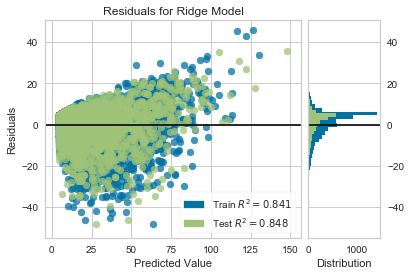

In [64]:
 # Plot the Residuals for Ridge Model
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()  

In [65]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 66.19215247655987, R2: 0.8483165672173062


# Predictive Model comparison with Actual Model

In [67]:
df = pd.read_csv('player_data/2016c.csv')
df.head(5)
cleandf = df[['EV', 'PP', 'SH']]
cleandf.head(5)

,EV,PP,SH
0,13,6,0
1,0,0,0
2,0,0,0
3,0,0,0
4,4,0,0


In [124]:
X = cleandf
y = df['PTS']

for index, row in X.iterrows():
    X_predict = sc.transform(X)
    y_predict = model.predict(X_predict)
    y_predict
    
comparison = pd.DataFrame({'Predicted Scores':y_predict, 'Actual Scores':y})
comparison.head(5)
comparison['Score Difference'] = y_predict - y
comparison['Score Difference'].describe()

count    898.000000
mean      -0.068207
std        8.013064
min      -46.138144
25%       -2.643267
50%        2.375241
75%        4.453850
max       42.172576
Name: Score Difference, dtype: float64

In [116]:
predictdf = pd.DataFrame(data=y_predict, columns=['Predicted Scores'])
actualdf = pd.DataFrame(data=y, columns=['Actual Scores'])

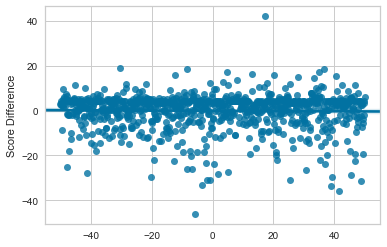

In [129]:
x = np.linspace(-50, 50, 898)
y = comparison['Score Difference']

sns.regplot(x,y)
plt.show()